In [14]:
import pandas as pd

df=pd.read_csv("2017_FPA_FOD_cons.csv")
from cleaning import *

C:\Users\axjui\AppData\Local\Temp\ipykernel_7232\1618610859.py:3: DtypeWarning: Columns (13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("2017_FPA_FOD_cons.csv")


In [15]:
df_final=full_data_cleaning_pipeline(df)

Pipeline de Nettoyage - Démarrage. Dimensions : (82279, 308)
Colonnes avec plus de 50.0% de NaN à supprimer : 21
Colonnes constantes à supprimer : 14
Total de colonnes supprimées (Step 1) : 29
--- DÉBUT DU NETTOYAGE DÉTAILLÉ (handle_aberrant_values) ---
   -> 223 colonnes float vérifiées.
   -> 97 valeurs techniques (-1e30) remplacées par NaN.
   -> 2624 codes d'erreur (< -900) remplacés par NaN.
   -> 1623 erreurs topo (32767) remplacées par NaN.
Total des cellules corrigées : 4344
-> Features temporelles (Mois, Jour) extraites.
-> Conversion des colonnes 'faux-textes' en numériques...
-> Colonnes catégorielles supprimées (Manuelles) : 15
-> Imputation des NaN catégoriels par 'Missing' sur 22 colonnes.
Dimensions avant traitement des NaN : (82279, 266)
   -> 'DISCOVERY_TIME' transformée en 'Discovery_Time_Hours'.
-> Colonnes supprimées (Leakage/IDs) : 5
-> Remplissage des valeurs manquantes (Médiane)...
   ALERTE : 10 colonnes sont entièrement vides (ex: ['EVH_1km', 'EVT_1km', 'EVC_1k

In [16]:
df=pd.read_csv("2020_FPA_FOD_cons.csv")
df_final_2=full_data_cleaning_pipeline(df)

C:\Users\axjui\AppData\Local\Temp\ipykernel_7232\1754511382.py:1: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("2020_FPA_FOD_cons.csv")


Pipeline de Nettoyage - Démarrage. Dimensions : (73221, 308)
Colonnes avec plus de 50.0% de NaN à supprimer : 23
Colonnes constantes à supprimer : 8
Total de colonnes supprimées (Step 1) : 24
--- DÉBUT DU NETTOYAGE DÉTAILLÉ (handle_aberrant_values) ---
   -> 225 colonnes float vérifiées.
   -> 92 valeurs techniques (-1e30) remplacées par NaN.
   -> 3409 codes d'erreur (< -900) remplacés par NaN.
   -> 1474 erreurs topo (32767) remplacées par NaN.
Total des cellules corrigées : 4975
-> Features temporelles (Mois, Jour) extraites.
-> Conversion des colonnes 'faux-textes' en numériques...
-> Colonnes catégorielles supprimées (Manuelles) : 15
-> Imputation des NaN catégoriels par 'Missing' sur 22 colonnes.
Dimensions avant traitement des NaN : (73221, 271)
   -> 'DISCOVERY_TIME' transformée en 'Discovery_Time_Hours'.
-> Colonnes supprimées (Leakage/IDs) : 4
-> Remplissage des valeurs manquantes (Médiane)...
   ALERTE : 10 colonnes sont entièrement vides (ex: ['EVH_1km', 'EVT_1km', 'EVC_1km

In [11]:
def check_final_dtypes():
    """
    Charge les données, applique le pipeline de nettoyage complet, et affiche 
    les types de données finaux (dtypes).
    """
    print("--- Démarrage de la vérification des types de données (dtypes) ---")
    filename = "2017_FPA_FOD_cons.csv" 
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"ERREUR: Le fichier '{filename}' est introuvable. Veuillez vérifier le nom du fichier.")
        sys.exit(1)

    # 1. Exécution du pipeline de nettoyage
    # Ceci exécute toutes les étapes, y compris l'encodage One-Hot.
    df_final = full_data_cleaning_pipeline(df)

    # 2. Récupération et affichage des types de données
    print("\n" + "="*50)
    print(" RÉSULTAT FINAL DES TYPES DE COLONNES (dtypes)")
    print("="*50)

    # Récupération des dtypes
    dtypes_series = df_final.dtypes
    
    # Conversion en DataFrame pour un affichage lisible
    dtypes_df = pd.DataFrame(dtypes_series, columns=['DataType'])
    
    # Trie par type de données pour regrouper les colonnes similaires
    dtypes_grouped = dtypes_df.sort_values(by='DataType')

    # Affichage du rapport complet
    print(dtypes_grouped.to_string())

    print("\n--- Synthèse des types ---")
    value_counts = dtypes_grouped['DataType'].value_counts()
    print(value_counts)
    print("-------------------------")

    # 3. Vérification de la présence de types non numériques
    non_numeric_types = value_counts.index.intersection(['object', 'category'])
    
    if len(non_numeric_types) > 0:
        print(f"⚠️ ALERTE : {len(non_numeric_types.tolist())} type(s) non-numérique(s) ('object' ou 'category') subsiste(nt). Vérifiez l'encodage.")
    else:
        # La cible (FIRE_SIZE_CLASS) est un int après le regroupement
        print("✅ SUCCÈS : Tous les types de données sont numériques (prêts pour XGBoost).")


if __name__ == "__main__":
    check_final_dtypes()

--- Démarrage de la vérification des types de données (dtypes) ---


C:\Users\axjui\AppData\Local\Temp\ipykernel_7232\1361968919.py:10: DtypeWarning: Columns (13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


Pipeline de Nettoyage - Démarrage. Dimensions : (82279, 308)
Colonnes avec plus de 50.0% de NaN à supprimer : 21
Colonnes constantes à supprimer : 14
Total de colonnes supprimées (Step 1) : 29
--- DÉBUT DU NETTOYAGE DÉTAILLÉ (handle_aberrant_values) ---
   -> 223 colonnes float vérifiées.
   -> 97 valeurs techniques (-1e30) remplacées par NaN.
   -> 2624 codes d'erreur (< -900) remplacés par NaN.
   -> 1623 erreurs topo (32767) remplacées par NaN.
Total des cellules corrigées : 4344
-> Features temporelles (Mois, Jour) extraites.
-> Conversion des colonnes 'faux-textes' en numériques...
-> Colonnes catégorielles supprimées (Manuelles) : 15
-> Imputation des NaN catégoriels par 'Missing' sur 22 colonnes.
Dimensions avant traitement des NaN : (82279, 266)
   -> 'DISCOVERY_TIME' transformée en 'Discovery_Time_Hours'.
-> Colonnes supprimées (Leakage/IDs) : 5
-> Remplissage des valeurs manquantes (Médiane)...
   ALERTE : 10 colonnes sont entièrement vides (ex: ['EVH_1km', 'EVT_1km', 'EVC_1k

--- Chargement et Nettoyage ---


C:\Users\axjui\AppData\Local\Temp\ipykernel_7232\1446335388.py:12: DtypeWarning: Columns (13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


Pipeline de Nettoyage - Démarrage. Dimensions : (82279, 308)
Colonnes avec plus de 50.0% de NaN à supprimer : 21
Colonnes constantes à supprimer : 14
Total de colonnes supprimées (Step 1) : 29
--- DÉBUT DU NETTOYAGE DÉTAILLÉ (handle_aberrant_values) ---
   -> 223 colonnes float vérifiées.
   -> 97 valeurs techniques (-1e30) remplacées par NaN.
   -> 2624 codes d'erreur (< -900) remplacés par NaN.
   -> 1623 erreurs topo (32767) remplacées par NaN.
Total des cellules corrigées : 4344
-> Features temporelles (Mois, Jour) extraites.
-> Conversion des colonnes 'faux-textes' en numériques...
-> Colonnes catégorielles supprimées (Manuelles) : 15
-> Imputation des NaN catégoriels par 'Missing' sur 22 colonnes.
Dimensions avant traitement des NaN : (82279, 266)
   -> 'DISCOVERY_TIME' transformée en 'Discovery_Time_Hours'.
-> Colonnes supprimées (Leakage/IDs) : 5
-> Remplissage des valeurs manquantes (Médiane)...
   ALERTE : 10 colonnes sont entièrement vides (ex: ['EVH_1km', 'EVT_1km', 'EVC_1k

C:\Users\axjui\AppData\Local\Temp\ipykernel_7232\1446335388.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['IS_LARGE_FIRE'] = df_clean['FIRE_SIZE_CLASS'].astype(str).map(large_fire_mapping)


--- Calcul des corrélations... ---

 TOP 20 FACTEURS AGGRAVANTS (Corrélation Positive)
 (Plus cette valeur est haute, plus le risque de Grand Feu augmente)
NWCG_REPORTING_AGENCY_BLM                               0.138326
NWCG_GENERAL_CAUSE_Natural                              0.129286
NWCG_CAUSE_CLASSIFICATION_Natural                       0.129286
EVH                                                     0.114404
NAME_Northern Cross Timbers and Lower Canadian Hills    0.113482
EVC                                                     0.111951
GAP_Prity                                               0.111505
STATE_OK                                                0.102926
EBLR_PFS                                                0.090299
Mang_Type_FED                                           0.088467
OWNER_DESCR_BLM                                         0.086110
EBL_ET                                                  0.085720
rpms_1km                                                0.084671

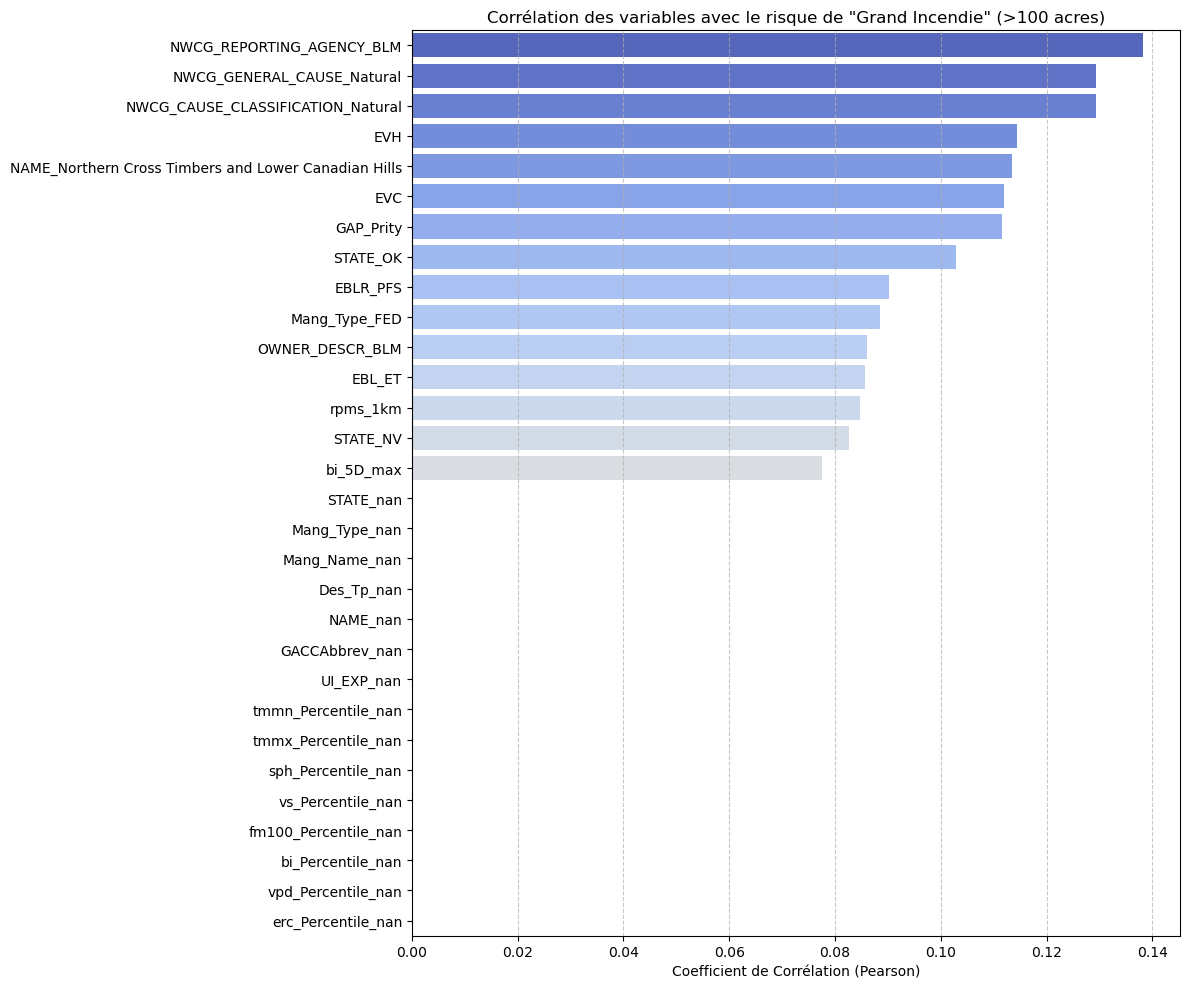

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from cleaning import full_data_cleaning_pipeline

# 1. CHARGEMENT ET NETTOYAGE
print("--- Chargement et Nettoyage ---")
# Remplacez par le nom de votre fichier
filename = "2017_FPA_FOD_cons.csv" 
try:
    df = pd.read_csv(filename)
except FileNotFoundError:
    print(f"Fichier {filename} introuvable.")
    exit()

# On applique le pipeline pour avoir des données propres (numériques + one-hot)
df_clean = full_data_cleaning_pipeline(df)

# 2. CRÉATION DE LA CIBLE BINAIRE "GRAND FEU"
# On considère "Grand" les classes D, E, F, G (soit > 100 acres)
print("\n--- Création de la cible 'IS_LARGE_FIRE' ---")
# Mapping : A,B,C -> 0 (Petit/Moyen) | D,E,F,G -> 1 (Grand)
large_fire_mapping = {
    'A': 0, 'B': 0, 'C': 0,
    'D': 1, 'E': 1, 'F': 1, 'G': 1
}

# Vérification que la colonne existe bien
if 'FIRE_SIZE_CLASS' in df_clean.columns:
    df_clean['IS_LARGE_FIRE'] = df_clean['FIRE_SIZE_CLASS'].astype(str).map(large_fire_mapping)
    # Suppression des lignes où la classe n'était pas reconnue (NaN)
    df_clean = df_clean.dropna(subset=['IS_LARGE_FIRE'])
    df_clean['IS_LARGE_FIRE'] = df_clean['IS_LARGE_FIRE'].astype(int)
else:
    print("Erreur : La colonne FIRE_SIZE_CLASS est introuvable.")
    exit()

# On retire les colonnes qui "trichent" (Target Leakage) ou qui sont la cible
cols_to_drop = [
    'FIRE_SIZE_CLASS', 'FIRE_SIZE', 
    'FOD_ID', 'ID'
]
df_analysis = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns], errors='ignore')

# 3. CALCUL DES CORRÉLATIONS
print("--- Calcul des corrélations... ---")
# On ne garde que les colonnes numériques pour la corrélation
numeric_df = df_analysis.select_dtypes(include=['number'])

# Calcul de la corrélation de toutes les features avec 'IS_LARGE_FIRE'
correlations = numeric_df.corrwith(numeric_df['IS_LARGE_FIRE']).sort_values(ascending=False)

# On retire la corrélation de la cible avec elle-même (qui vaut 1.0)
correlations = correlations.drop(labels=['IS_LARGE_FIRE'], errors='ignore')

# 4. AFFICHAGE DES RÉSULTATS
print("\n" + "="*50)
print(" TOP 20 FACTEURS AGGRAVANTS (Corrélation Positive)")
print(" (Plus cette valeur est haute, plus le risque de Grand Feu augmente)")
print("="*50)
print(correlations.head(20))

print("\n" + "="*50)
print(" TOP 20 FACTEURS PROTECTEURS (Corrélation Négative)")
print(" (Plus cette valeur est haute, plus le risque de Grand Feu diminue)")
print("="*50)
print(correlations.tail(20))

# 5. VISUALISATION
plt.figure(figsize=(12, 10))
# On prend les 15 meilleurs et les 15 pires
top_corr = pd.concat([correlations.head(15), correlations.tail(15)])

sns.barplot(y=top_corr.index, x=top_corr.values, palette='coolwarm')
plt.title('Corrélation des variables avec le risque de "Grand Incendie" (>100 acres)')
plt.xlabel('Coefficient de Corrélation (Pearson)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
# Importations nécessaires
from sklearn.model_selection import train_test_split
from typing import Tuple

def separate_features_and_target(df: pd.DataFrame, target_column: str = 'FIRE_SIZE') -> Tuple[pd.DataFrame, pd.Series]:
    """
    Sépare le DataFrame en caractéristiques (X) et variable cible (y).
    
    Args:
        df: Le DataFrame nettoyé et encodé (df_final).
        target_column: Le nom de la colonne cible (par défaut 'FIRE_SIZE').
        
    Returns:
        Un tuple contenant (X, y).
    """
    print(f"--- 1. Séparation de la cible '{target_column}' ---")
    
    # Vérification de l'existence de la colonne cible
    if target_column not in df.columns:
        raise ValueError(f"La colonne cible '{target_column}' n'existe pas dans le DataFrame.")
        
    # X contient toutes les colonnes sauf la cible
    X = df.drop(columns=[target_column])
    # y contient uniquement la cible
    y = df[target_column]
    
    print(f"   -> X (Caractéristiques): {X.shape}")
    print(f"   -> y (Cible): {y.shape}")
    
    return X, y

def split_data_for_modeling(X: pd.DataFrame, y: pd.Series, test_size: float = 0.2, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Sépare les données en ensembles d'entraînement et de test.
    
    Args:
        X: DataFrame des caractéristiques.
        y: Series de la variable cible.
        test_size: Proportion des données à utiliser pour l'ensemble de test (par défaut 20%).
        random_state: Graine pour la reproductibilité de la séparation (par défaut 42).
        
    Returns:
        Un tuple contenant (X_train, X_test, y_train, y_test).
    """
    print("\n--- 2. Séparation Train/Test ---")
    
    # Utilisation de train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=test_size,  # 20% des données pour le test
        random_state=random_state, # Assure que la séparation est la même à chaque exécution
        # Si vous faisiez de la classification, vous utiliseriez stratify=y ici.
    )
    
    print(f"   -> Taille du jeu d'entraînement (Train) : {len(X_train)} échantillons ({100*(1-test_size):.0f}%)")
    print(f"   -> Taille du jeu de test (Test) : {len(X_test)} échantillons ({100*test_size:.0f}%)")
    
    return X_train, X_test, y_train, y_test

# --- APPLICATION DU CODE ---

# 1. Séparer X et y
try:
    X, y = separate_features_and_target(df_final, target_column='FIRE_SIZE')
    
    # 2. Séparer en jeux d'entraînement et de test
    X_train, X_test, y_train, y_test = split_data_for_modeling(X, y)
    
    print("\nSéparation des données terminée avec succès!")
    
except ValueError as e:
    print(f"ERREUR LORS DE LA SÉPARATION : {e}")

# Note: X_train, X_test, y_train, y_test sont maintenant disponibles pour l'entraînement du modèle.

--- 1. Séparation de la cible 'FIRE_SIZE' ---
   -> X (Caractéristiques): (67961, 500)
   -> y (Cible): (67961,)

--- 2. Séparation Train/Test ---
   -> Taille du jeu d'entraînement (Train) : 54368 échantillons (80%)
   -> Taille du jeu de test (Test) : 13593 échantillons (20%)

Séparation des données terminée avec succès!



--- Correction des noms de colonnes pour XGBoost ---
   -> 6 colonnes ont été renommées.

--- Correction des noms de colonnes pour XGBoost ---
   -> 6 colonnes ont été renommées.
--- 1. Initialisation du modèle XGBoost ---

--- 2. Entraînement du Modèle (sur X_train_clean, y_train) ---
   -> Entraînement terminé.

--- 3. Prédiction sur l'ensemble de Test (X_test_clean) ---
   -> Prédiction terminée.

--- 4. Évaluation des Métriques de Régression ---
   -> Erreur Quadratique Moyenne (MSE) : 1,530,383.79
   -> Racine de l'Erreur Quadratique Moyenne (RMSE) : 1,237.09
   -> Erreur Absolue Moyenne (MAE) : 23.47
   -> Coefficient de Détermination (R-squared ou R2) : 0.1423

--- 5. Analyse de l'Importance des Caractéristiques ---
Top 10 des caractéristiques les plus importantes :
bi_5D_max                  0.495272
FIRE_SIZE_CLASS_G          0.214726
th_5D_max                  0.109622
rmin                       0.027912
NDVI-1day                  0.020641
FOD_ID                     0.019365

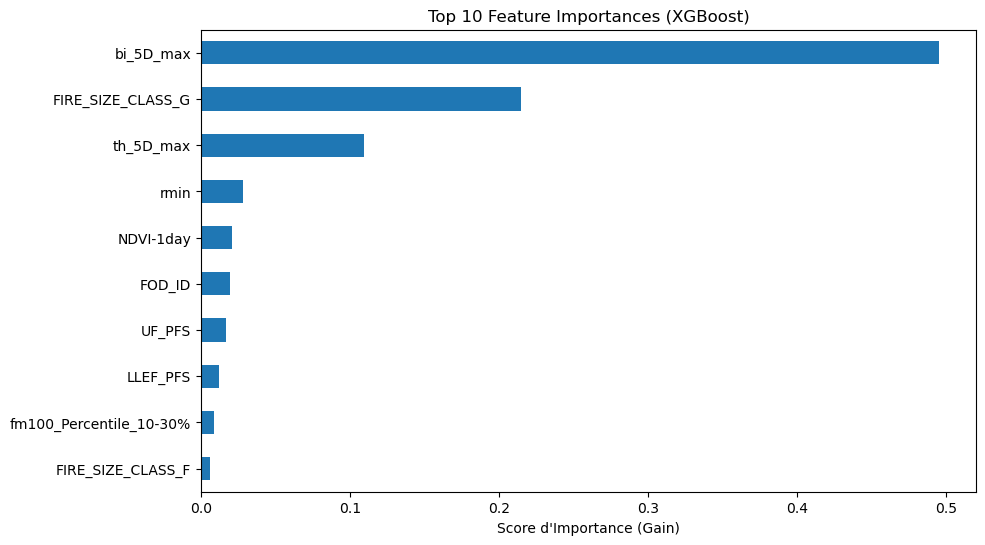

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import re
# Assurez-vous d'avoir pandas (pd) et matplotlib.pyplot (plt) importés dans votre notebook/script.

def clean_feature_names(df: pd.DataFrame) -> pd.DataFrame:
    """Nettoie les noms de colonnes pour les rendre compatibles avec XGBoost."""
    print("\n--- Correction des noms de colonnes pour XGBoost ---")
    new_columns = {}
    pattern = re.compile(r'[\[\]<]')
    
    for col in df.columns:
        new_name = pattern.sub('_', col)
        new_name = new_name.strip()
        if new_name != col:
            new_columns[col] = new_name

    df_cleaned = df.rename(columns=new_columns)
    
    if new_columns:
        print(f"   -> {len(new_columns)} colonnes ont été renommées.")
    else:
        print("   -> Aucune colonne n'a nécessité de renommage.")
        
    return df_cleaned

# L'appel est bien placé ici
X_train_clean = clean_feature_names(X_train)
X_test_clean = clean_feature_names(X_test)

# --- 1. Initialisation du Modèle XGBoost pour la Régression ---
print("--- 1. Initialisation du modèle XGBoost ---")

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100,             
    learning_rate=0.1,             
    max_depth=6,                   
    random_state=42,
    n_jobs=-1                      
)

# --- 2. Entraînement du Modèle ---
print("\n--- 2. Entraînement du Modèle (sur X_train_clean, y_train) ---")
try:
    # CORRECTION 1 : Utiliser X_train_clean
    xgb_model.fit(X_train_clean, y_train) 
    print("   -> Entraînement terminé.")
    
    # --- 3. Prédiction sur l'ensemble de Test ---
    print("\n--- 3. Prédiction sur l'ensemble de Test (X_test_clean) ---")
    # CORRECTION 2 : Utiliser X_test_clean
    y_pred = xgb_model.predict(X_test_clean) 
    print("   -> Prédiction terminée.")
    
    # --- 4. Évaluation de la Performance ---
    print("\n--- 4. Évaluation des Métriques de Régression ---")
    
    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"   -> Erreur Quadratique Moyenne (MSE) : {mse:,.2f}")
    print(f"   -> Racine de l'Erreur Quadratique Moyenne (RMSE) : {rmse:,.2f}")
    print(f"   -> Erreur Absolue Moyenne (MAE) : {mae:,.2f}")
    print(f"   -> Coefficient de Détermination (R-squared ou R2) : {r2:.4f}")

    # --- 5. Analyse de l'Importance des Caractéristiques (Feature Importance) ---
    print("\n--- 5. Analyse de l'Importance des Caractéristiques ---")
    
    # CORRECTION 3 : Utiliser les colonnes de X_train_clean
    feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train_clean.columns) 
    
    # Afficher les 10 caractéristiques les plus importantes
    top_10_features = feature_importances.nlargest(10)
    print("Top 10 des caractéristiques les plus importantes :")
    print(top_10_features)
    
    # Création d'une figure pour visualiser l'importance (optionnel)
    plt.figure(figsize=(10, 6))
    top_10_features.plot(kind='barh')
    plt.title('Top 10 Feature Importances (XGBoost)')
    plt.xlabel('Score d\'Importance (Gain)')
    plt.gca().invert_yaxis()
    plt.show() 
    
except NameError as e:
    print(f"\nERREUR: Une variable essentielle n'est pas définie. Détail de l'erreur : {e}")
except Exception as e:
    print(f"\nERREUR: Une autre erreur est survenue lors de l'entraînement ou de la prédiction. Détail : {e}")

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from typing import Tuple, List
import re # Nécessaire pour le nettoyage des noms

# --- Fonction de Séparation (Retirée précédemment) ---
def separate_features_and_target(df: pd.DataFrame, target_column: str = 'FIRE_SIZE_CLASS') -> Tuple[pd.DataFrame, pd.Series]:
    """Sépare le DataFrame en caractéristiques (X) et variable cible (y)."""
    print(f"--- 1. Séparation de la cible '{target_column}' ---")
    
    if target_column not in df.columns:
        # Ceci peut arriver si la colonne cible a été renommée lors de l'encodage
        print(f"ERREUR: La colonne cible '{target_column}' n'existe pas dans le DataFrame.")
        # Afficher les colonnes pour debug
        print(f"Colonnes disponibles (extrait) : {df.columns.tolist()[:10]}...") 
        raise ValueError(f"La colonne cible '{target_column}' est manquante.")
        
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    print(f"   -> X (Caractéristiques): {X.shape}")
    print(f"   -> y (Cible): {y.shape}")
    
    return X, y

# --- Fonction de Préparation Avancée (Corrigée pour la fuite) ---

def prepare_for_modeling(df: pd.DataFrame) -> pd.DataFrame:
    """
    Effectue les suppressions finales des IDs et la **correction de la fuite de données**.
    Prépare la cible Classification (FIRE_SIZE_CLASS) par encodage ordinal.
    """
    df_prep = df.copy()
    
    # Suppression explicite des identifiants non prédictifs ET de la source de fuite
    cols_to_banish = [
        'FOD_ID', 
        'ID', 
        'FIRE_SIZE', # L'original numérique
        # 🚨 CORRECTION FUITE : Suppression des colonnes One-Hot de la cible
        'FIRE_SIZE_CLASS_A', 'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 
        'FIRE_SIZE_CLASS_D', 'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 
        'FIRE_SIZE_CLASS_G', 'FIRE_SIZE_CLASS_nan' 
    ]
    
    cols_to_remove = [c for c in cols_to_banish if c in df_prep.columns]
    
    if cols_to_remove:
        df_prep = df_prep.drop(columns=cols_to_remove, errors='ignore')
        print(f"-> Suppression des colonnes IDs/non-prédictives/Fuite : {len(cols_to_remove)} colonnes.")

    # Préparation de la cible Classification: Encodage Ordinal
    target_class = 'FIRE_SIZE_CLASS'
    if target_class in df_prep.columns:
        le = LabelEncoder()
        # Encodage ordinal (0, 1, 2, ...)
        df_prep[target_class] = le.fit_transform(df_prep[target_class].astype(str))
        print(f"-> Encodage ordinal appliqué à la cible de Classification : '{target_class}'")
        
    return df_prep

def advanced_data_preparation_pipeline(df: pd.DataFrame) -> pd.DataFrame:
    """Exécute le pipeline de préparation avancé pour la classification."""
    df_temp = df.copy()
    print("\n" + "=" * 50)
    print("Démarrage du Pipeline de Préparation Avancée")
    print("=" * 50)
    
    df_temp = prepare_for_modeling(df_temp)
    
    # Suppression de la cible de régression originale si elle n'a pas été gérée
    df_temp = df_temp.drop(columns=['FIRE_SIZE'], errors='ignore') # <-- Ligne complétée
    
    # Affichage des dimensions finales
    print("-" * 50)
    print(f"Pipeline terminé. Dimensions finales : {df_temp.shape}")
    print("-" * 50)
    
    return df_temp

In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re # Nécessaire pour la fonction de nettoyage des noms

# --------------------------------------------------------------------------
# A. FONCTION DE NETTOYAGE DES NOMS (Nécessaire si elle n'est pas déjà dans le contexte)
# --------------------------------------------------------------------------
def clean_feature_names(df: pd.DataFrame) -> pd.DataFrame:
    """Nettoie les noms de colonnes pour les rendre compatibles avec XGBoost."""
    new_columns = {}
    pattern = re.compile(r'[\[\]<]')
    
    for col in df.columns:
        new_name = pattern.sub('_', col)
        new_name = new_name.strip()
        if new_name != col:
            new_columns[col] = new_name

    return df.rename(columns=new_columns)

# --------------------------------------------------------------------------
# B. APPLICATION DE LA CORRECTION SUR LES NOUVELLES DONNÉES
# --------------------------------------------------------------------------
print("\n--- Correction des noms de colonnes pour le XGBoost Classifier ---")
# On utilise X_train_new et X_test_new (créés par votre train_test_split)
X_train_clean_c = clean_feature_names(X_train_new)
X_test_clean_c = clean_feature_names(X_test_new)
print(f"   -> Noms nettoyés pour l'entraînement : {X_train_clean_c.shape}")

# --------------------------------------------------------------------------
# C. MODÉLISATION ET ÉVALUATION
# --------------------------------------------------------------------------

# --- 1. Initialisation du Modèle XGBoost pour la CLASSIFICATION ---
print("\n--- 1. Initialisation du modèle XGBoost Classifier ---")

# Utilisation de XGBClassifier
xgb_model_c = xgb.XGBClassifier(
    objective='multi:softmax',     # Fonction objectif pour la classification multi-classe
    num_class=len(np.unique(y_train_new)), # Nombre de classes (doit être 7 si A-G)
    n_estimators=100,              
    learning_rate=0.1,             
    max_depth=6,                   
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,       # Option moderne pour éviter un avertissement
    eval_metric='mlogloss'         # Métrique d'évaluation
)

# --- 2. Entraînement du Modèle ---
print("\n--- 2. Entraînement du Modèle (sur X_train_clean_c, y_train_new) ---")
try:
    xgb_model_c.fit(X_train_clean_c, y_train_new)
    print("   -> Entraînement terminé.")
    
    # --- 3. Prédiction sur l'ensemble de Test ---
    print("\n--- 3. Prédiction sur l'ensemble de Test (X_test_clean_c) ---")
    y_pred_c = xgb_model_c.predict(X_test_clean_c)
    print("   -> Prédiction terminée.")
    
    # --- 4. Évaluation de la Performance ---
    print("\n--- 4. Évaluation des Métriques de CLASSIFICATION ---")
    
    # Calcul de la précision globale
    accuracy = accuracy_score(y_test_new, y_pred_c)
    print(f"   -> Précision Globale (Accuracy) : {accuracy:.4f}")

    # Rapport de Classification (Précision, Rappel, F1-Score par classe)
    print("\n--- Rapport de Classification ---")
    print(classification_report(y_test_new, y_pred_c, zero_division=0))
    
    # Affichage de la Matrice de Confusion (optionnel mais très utile)
    print("--- Matrice de Confusion ---")
    cm = confusion_matrix(y_test_new, y_pred_c)
    print(cm)

except Exception as e:
    print(f"\nERREUR LORS DE L'ENTRAÎNEMENT OU DE LA PRÉDICTION : {e}")


--- Correction des noms de colonnes pour le XGBoost Classifier ---
   -> Noms nettoyés pour l'entraînement : (54368, 498)

--- 1. Initialisation du modèle XGBoost Classifier ---

--- 2. Entraînement du Modèle (sur X_train_clean_c, y_train_new) ---


c:\Users\axjui\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   -> Entraînement terminé.

--- 3. Prédiction sur l'ensemble de Test (X_test_clean_c) ---
   -> Prédiction terminée.

--- 4. Évaluation des Métriques de CLASSIFICATION ---
   -> Précision Globale (Accuracy) : 0.9996

--- Rapport de Classification ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13581
           1       1.00      0.50      0.67        12

    accuracy                           1.00     13593
   macro avg       1.00      0.75      0.83     13593
weighted avg       1.00      1.00      1.00     13593

--- Matrice de Confusion ---
[[13581     0]
 [    6     6]]
